# (1) 데이터 가져오기
sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

df_X = diabetes.data
df_y = diabetes.target

# (2) 모델에 입력할 데이터 X 준비하기
df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [2]:
import numpy as np

df_X = np.array(df_X)

# (3) 모델에 예측할 데이터 y 준비하기
df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [3]:
df_y = np.array(df_y)

# (4) train 데이터와 test 데이터로 분리하기
X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

In [5]:
df_X.shape

(442, 10)

# (5) 모델 준비하기
입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
모델 함수를 구현해주세요.

In [6]:
W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    y_pred = [] # 예측값을 저장할 빈 리스트 생성
    for i in range(len(X)):
        # 데이터 특성 수만큼 가중치 * 데이터 + 데이터 샘플 수만큼 바이어스 더함(i는 데이터 샘플 수, j는 데이터 특성 수)
        prediction = sum(W[j] * X[i][j] for j in range(len(W))) + b 
        y_pred.append(prediction) # 최종 예측값을 y_pred에 추가
    return np.array(y_pred) # 최종 예측값을 array로 반환

# (6) 손실함수 loss 정의하기
손실함수를 MSE 함수로 정의해주세요.

In [7]:
def loss(X, W, b, y):
    predictions = model(X, W, b) # 랜덤값으로 만들어진 모델을 predictions 변수에 넣음
    L = ((predictions - y) ** 2).mean() # 위 모델과 y의 오차를 제곱하여 평균한 MSE값으로 Loss 구함
    return L

# (7) 기울기를 구하는 gradient 함수 구현하기
기울기를 계산하는 gradient 함수를 구현해주세요.

In [8]:
def gradient(X, W, b, y):
    N = len(y) # 데이터 샘플 개수
    y_pred = model(X, W, b) # 난수값으로 만든 모델 생성
    dW = 1/N * 2 * X.T.dot(y_pred - y) # W의 gradient 계산
    db = 2 * (y_pred - y).mean() # b의 gradient 계산
    return dW, db

# (8) 하이퍼 파라미터인 학습률 설정하기
학습률, learning rate 를 설정해주세요
만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [9]:
LEARNING_RATE = 0.9

# (9) 모델 학습하기
정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [10]:
losses = [] # 손실값 저장할 리스트

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train) # 기울기 계산
    W -= LEARNING_RATE * dW # 가중치를 학습률과 기울기를 통해 업데이트
    b -= LEARNING_RATE * db # 바이어스를 학습률과 기울기를 통해 업데이트
    L = loss(X_train, W, b, y_train) # 현재 가중치와 바이어스에서 손실값 계산
    losses.append(L) # 손실값을 리스트에 추가
    if i % 1000 == 0:
        print('%d번째 반복: 손실값 %0.4f' % (i, L))

1000번째 반복: 손실값 2898.7595
2000번째 반복: 손실값 2895.5044
3000번째 반복: 손실값 2893.5335
4000번째 반복: 손실값 2891.7170
5000번째 반복: 손실값 2890.0342
6000번째 반복: 손실값 2888.4745
7000번째 반복: 손실값 2887.0283
8000번째 반복: 손실값 2885.6874
9000번째 반복: 손실값 2884.4439
10000번째 반복: 손실값 2883.2906


# (10) test 데이터에 대한 성능 확인하기
test 데이터에 대한 성능을 확인해주세요.

In [11]:
prediction = model(X_test, W, b) # 테스트 데이터에 대해 모델을 사용하여 예측값을 계산
mse = loss(X_test, W, b, y_test) # 테스트 데이터에서의 손실(MSE) 계산
mse # 손실값 출력

2886.5765915559714

# (11) 정답 데이터와 예측한 데이터 시각화하기
x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

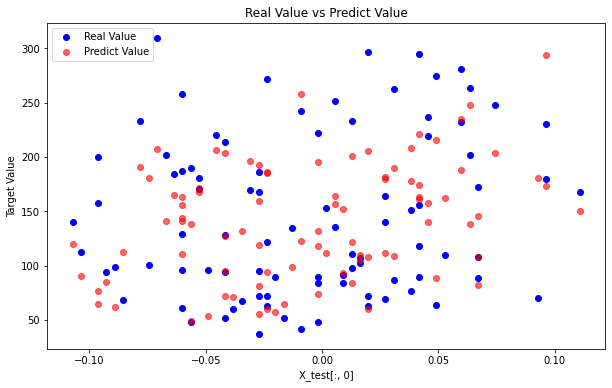

In [12]:
import matplotlib.pyplot as plt

# x축에는 X_test의 첫 번째 컬럼, y축에는 target
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Real Value')
plt.scatter(X_test[:, 0], prediction, color='red', label='Predict Value', alpha=0.6)

plt.title('Real Value vs Predict Value')
plt.xlabel('X_test[:, 0]')
plt.ylabel('Target Value')
plt.legend()
plt.show()

In [13]:
''' 회고
어떠한 수행을 거쳐도 Loss 값이 2883 근처로 나와서 아쉬웠습니다.
그래도 처음에 learning_rate = 1, 반복 2000번으로 수행했으나 Loss 값이 만단위라 
계속해서 러닝레이트와 반복횟수를 조정하여 Loss를 2885 미만으로 획득했습니다.
프로젝트를 진행하며 에러는 시각화 부분에서 title, label을 한글로 적어
글자가 깨져보여 다시 영어로 수정한 부분 외에는 없습니다.
'''

' 회고\n어떠한 수행을 거쳐도 Loss 값이 2883 근처로 나와서 아쉬웠습니다.\n그래도 처음에 learning_rate = 1, 반복 2000번으로 수행했으나 Loss 값이 만단위라 \n계속해서 러닝레이트와 반복횟수를 조정하여 Loss를 2885 미만으로 획득했습니다.\n프로젝트를 진행하며 에러는 시각화 부분에서 title, label을 한글로 적어\n글자가 깨져보여 다시 영어로 수정한 부분 외에는 없습니다.\n'